<a href="https://colab.research.google.com/github/manvikakatragadda/Forecasting-Precipitation-Patterns-using-Machine-Learning/blob/main/MINOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
full_data = pd.read_csv('/content/weatherAUS1.csv')
full_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,12/2/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12/3/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,12/4/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,12/5/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
full_data.shape

(145460, 23)

In [ ]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
full_data['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
full_data['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

<ipython-input-4-aef3d0e701c1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  full_data['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
<ipython-input-4-aef3d0e701c1>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  full_data['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
<ipyth

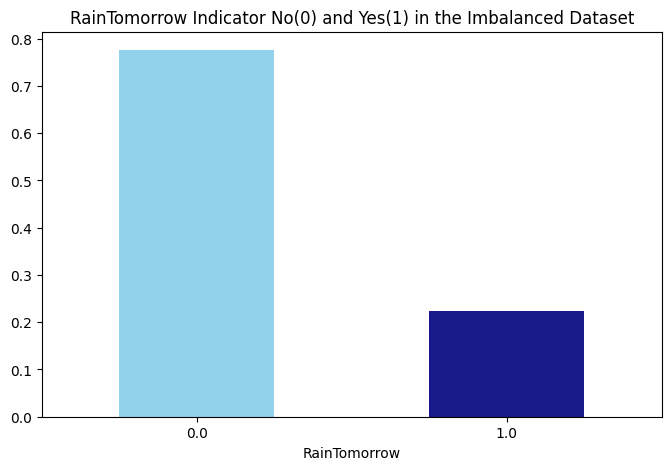

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
full_data.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')
plt.show()

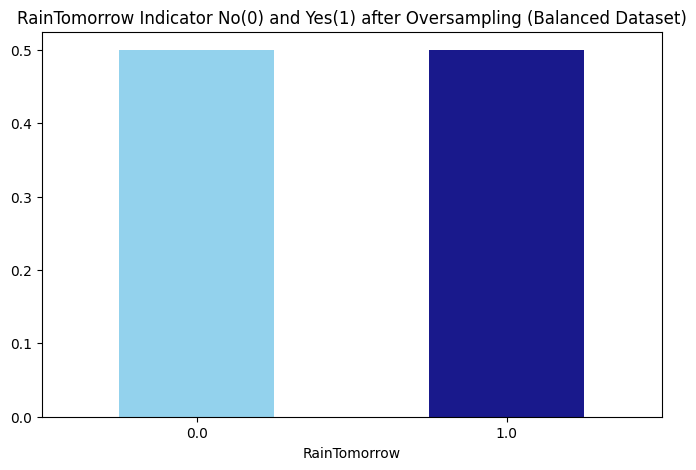

In [ ]:
from sklearn.utils import resample

no = full_data[full_data.RainTomorrow == 0]
yes = full_data[full_data.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (8,5))
oversampled.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
plt.show()

<Axes: >

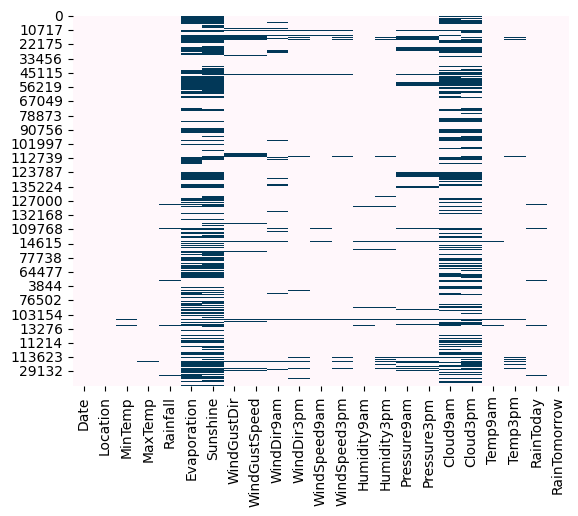

In [ ]:
import seaborn as sns
sns.heatmap(oversampled.isnull(), cbar=False, cmap='PuBu')

In [ ]:
total = oversampled.isnull().sum().sort_values(ascending=False)
percent = (oversampled.isnull().sum()/oversampled.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(4)

,Total,Percent
Sunshine,104831,0.475140
Evaporation,95411,0.432444
Cloud3pm,85614,0.388040
Cloud9am,81339,0.368664


In [ ]:
oversampled.select_dtypes(include=['object']).columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [ ]:
oversampled['Date'] = oversampled['Date'].fillna(oversampled['Date'].mode()[0])
oversampled['Location'] = oversampled['Location'].fillna(oversampled['Location'].mode()[0])
oversampled['WindGustDir'] = oversampled['WindGustDir'].fillna(oversampled['WindGustDir'].mode()[0])
oversampled['WindDir9am'] = oversampled['WindDir9am'].fillna(oversampled['WindDir9am'].mode()[0])
oversampled['WindDir3pm'] = oversampled['WindDir3pm'].fillna(oversampled['WindDir3pm'].mode()[0])

In [ ]:

from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in oversampled.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    oversampled[col] = lencoders[col].fit_transform(oversampled[col])

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed = oversampled.copy(deep=True)
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(oversampled)

In [ ]:
MiceImputed.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,890,2,13.4,22.9,0.6,6.283561,7.687100,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.000000,4.858344,16.9,21.8,0.0,0.0
1,989,2,7.4,25.1,0.0,6.327941,11.546406,14,44.0,6,...,44.0,25.0,1010.6,1007.8,2.133639,2.807352,17.2,24.3,0.0,0.0
2,1088,2,12.9,25.7,0.0,8.121218,12.385938,15,46.0,13,...,38.0,30.0,1007.6,1008.7,2.001495,2.000000,21.0,23.2,0.0,0.0
3,1115,2,9.2,28.0,0.0,6.633061,11.826881,4,24.0,9,...,45.0,16.0,1017.6,1012.8,1.604724,2.284060,18.1,26.5,0.0,0.0
4,1124,2,17.5,32.3,1.0,6.913871,5.714739,13,41.0,1,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0


In [ ]:
MiceImputed.isna()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133585,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
117307,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
87307,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
56427,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
Q1 = MiceImputed.quantile(0.25)
Q3 = MiceImputed.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Date             1714.000000
Location           25.000000
MinTemp             9.300000
MaxTemp            10.200000
Rainfall            2.400000
Evaporation         4.200000
Sunshine            5.998532
WindGustDir         9.000000
WindGustSpeed      19.000000
WindDir9am          8.000000
WindDir3pm          8.000000
WindSpeed9am       13.000000
WindSpeed3pm       11.000000
Humidity9am        26.000000
Humidity3pm        30.000000
Pressure9am         8.799071
Pressure3pm         8.800000
Cloud9am            4.000000
Cloud3pm            3.669761
Temp9am             9.300000
Temp3pm             9.800000
RainToday           1.000000
RainTomorrow        1.000000
dtype: float64


In [ ]:
MiceImputed = MiceImputed[~((MiceImputed < (Q1 - 1.5 * IQR)) |(MiceImputed > (Q3 + 1.5 * IQR))).any(axis=1)]
MiceImputed.shape

(170948, 23)

<Axes: >

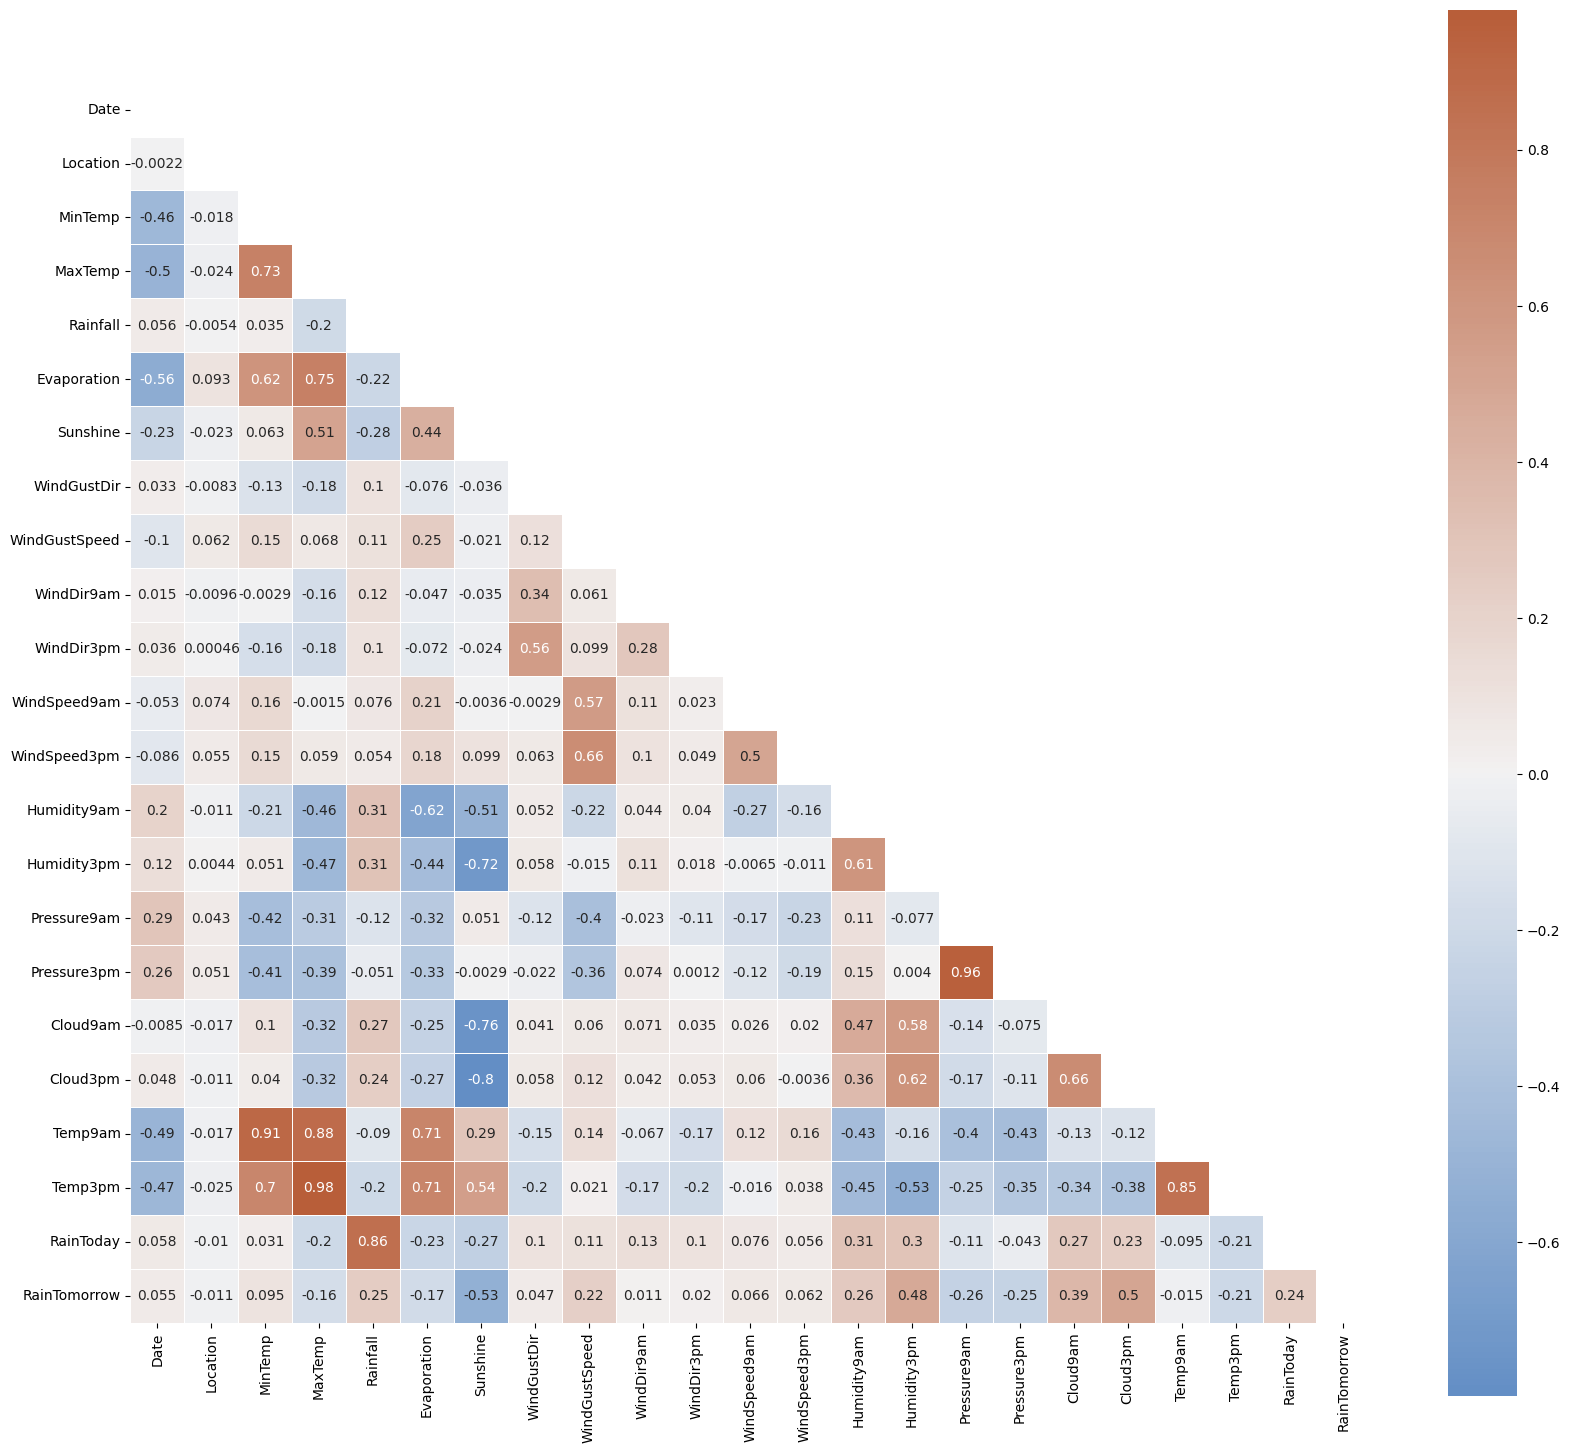

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr = MiceImputed.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

In [ ]:
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(MiceImputed)
modified_data = pd.DataFrame(r_scaler.transform(MiceImputed), index=MiceImputed.index, columns=MiceImputed.columns)
modified_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.259098,0.041667,0.543417,0.514778,0.437415,0.583168,0.517985,0.866667,0.521127,0.866667,...,0.552231,0.232613,0.245714,0.298295,0.837450,0.429474,0.507067,0.530612,0.246351,0.0
1,0.287918,0.041667,0.375350,0.568966,0.374905,0.585979,0.741670,0.933333,0.521127,0.400000,...,0.247941,0.262127,0.328571,0.318182,0.341384,0.248168,0.515193,0.594388,0.246351,0.0
2,0.316739,0.041667,0.529412,0.583744,0.374905,0.699572,0.790330,1.000000,0.549296,0.866667,...,0.180320,0.311319,0.242857,0.343750,0.330210,0.176799,0.618113,0.566327,0.246351,0.0
3,0.324600,0.041667,0.425770,0.640394,0.374905,0.605307,0.757927,0.266667,0.239437,0.600000,...,0.259211,0.173583,0.528571,0.460227,0.296658,0.201909,0.539568,0.650510,0.246351,0.0
4,0.327220,0.041667,0.658263,0.746305,0.479088,0.623094,0.403667,0.866667,0.478873,0.066667,...,0.676202,0.340834,0.334286,0.267045,0.752889,0.707194,0.531443,0.732143,0.246351,0.0


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
X = modified_data.loc[:,modified_data.columns!='RainTomorrow']
y = modified_data[['RainTomorrow']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday'],
      dtype='object')


In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = MiceImputed.drop('RainTomorrow', axis=1)
y = MiceImputed['RainTomorrow']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['Sunshine', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm']
[0.03691119 0.02851074 0.03310279 0.03252845 0.02269302 0.03255293
 0.13154295 0.02079777 0.04248687 0.02095658 0.02182666 0.02163635
 0.02365292 0.03366684 0.1104708  0.0485792  0.06083371 0.0558731
 0.14182317 0.03183352 0.03587214 0.0118483 ]


In [ ]:
import numpy as np
import random
import tensorflow as tf
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)


In [ ]:
features = MiceImputed[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir',
                       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
                       'RainToday']]
target = MiceImputed['RainTomorrow']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=12345)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
def plot_roc_cur(fper, tper):
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [ ]:
import itertools
import time
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, roc_curve, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    classes = np.unique(y_test)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0 = time.time()
    if verbose == False:
        model.fit(X_train, y_train, verbose=0)
    else:
        model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time() - t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test, y_pred, digits=5))

    probs = model.predict_proba(X_test)
    probs = probs[:, 1]
    fper, tper, thresholds = roc_curve(y_test, probs)
    plt.figure(figsize=(8, 6))
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    plot_confusion_matrix(model, X_test, y_test)
    plt.show()

    return model, accuracy, roc_auc, coh_kap, time_taken

Accuracy = 0.9289608535929055
ROC Area under Curve = 0.9303514583658652
Cohen's Kappa = 0.8565310505764735
Time taken = 38.80400514602661
              precision    recall  f1-score   support

         0.0    0.95270   0.91880   0.93545     23941
         1.0    0.90106   0.94190   0.92103     18796

    accuracy                        0.92896     42737
   macro avg    0.92688   0.93035   0.92824     42737
weighted avg    0.92999   0.92896   0.92910     42737



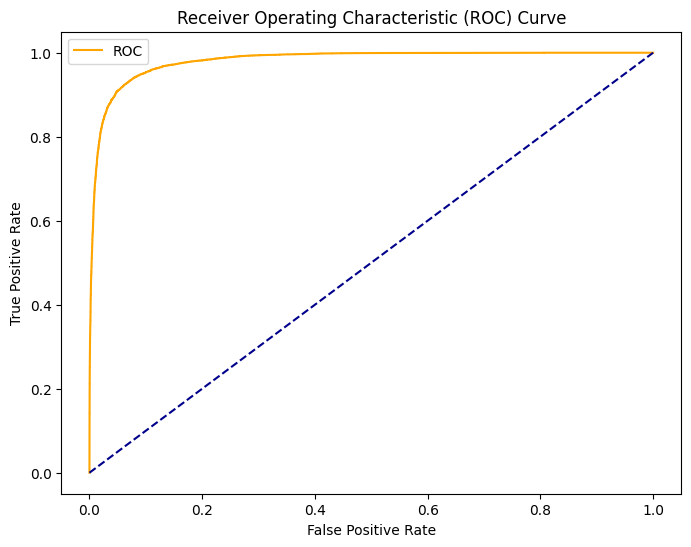

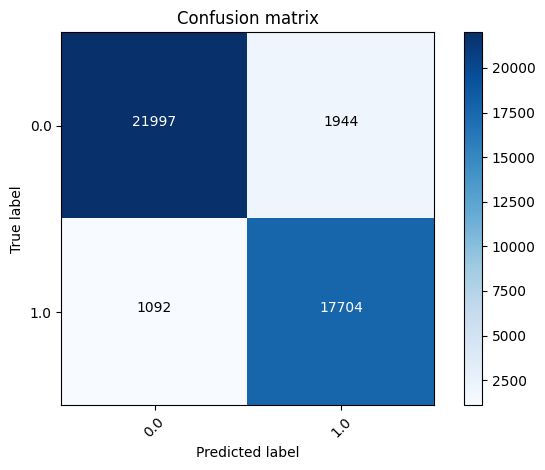

In [ ]:
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

In [ ]:
def predict_weather(model, new_data):

    new_data = pd.DataFrame(new_data)


    for col in new_data.select_dtypes(include=['object']).columns:
        if col in lencoders:
            new_data[col] = lencoders[col].transform(new_data[col])

    new_data = scaler.transform(new_data)


    prediction = model.predict(new_data)
    prediction_proba = model.predict_proba(new_data)

    return prediction, prediction_proba


In [ ]:
new_data_point = {
    'Location': 'Albury',
    'MinTemp': 10.4,
    'MaxTemp': 22.9,
    'Rainfall': 1.6,
    'Evaporation': 1.4,
    'Sunshine': 7.6,
    'WindGustDir': 'NW',
    'WindGustSpeed': 30,
    'WindDir9am': 'N',
    'WindDir3pm': 'NW',
    'WindSpeed9am': 6,
    'WindSpeed3pm': 20,
    'Humidity9am': 58,
    'Humidity3pm': 45,
    'Pressure9am': 1012.3,
    'Pressure3pm': 1009.6,
    'Cloud9am': 2,
    'Cloud3pm': 3,
    'Temp9am': 17.0,
    'Temp3pm': 21.8,
    'RainToday': 0
}


new_data_df = pd.DataFrame([new_data_point])


prediction, prediction_proba = predict_weather(model_rf, new_data_df)


print("{:.2f}".format(prediction_proba[0][1]*100)+"% of rain")

44.77% of rain


In [ ]:
import joblib
joblib.dump(model_rf, 'model_rf.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(lencoders, 'lencoders.pkl')

['lencoders.pkl']

Accuracy = 0.7939958349907574
ROC Area under Curve = 0.7877020258952369
Cohen's Kappa = 0.5791852658975274
Time taken = 1.526165246963501
              precision    recall  f1-score   support

         0.0    0.80174   0.83998   0.82041     23941
         1.0    0.78300   0.73542   0.75846     18796

    accuracy                        0.79400     42737
   macro avg    0.79237   0.78770   0.78944     42737
weighted avg    0.79349   0.79400   0.79317     42737



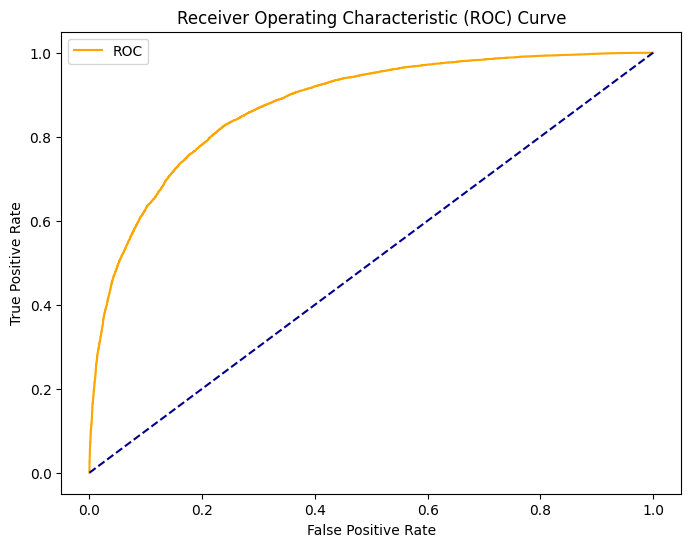

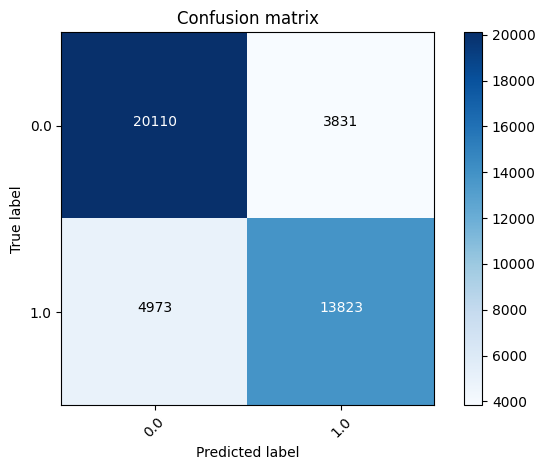

Logistic Regression Prediction: [0.]
Logistic Regression Probability of Rain: 35.69%


In [ ]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

params_lr = {'solver': 'liblinear', 'random_state': 12345}
model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)
prediction_lr, prediction_proba_lr = predict_weather(model_lr, new_data_df)


prediction_lr, prediction_proba_lr = predict_weather(model_lr, new_data_df)
print("Logistic Regression Prediction:", prediction_lr)
print("Logistic Regression Probability of Rain:", "{:.2f}%".format(prediction_proba_lr[0][1]*100))



Accuracy = 0.8326508645904017
ROC Area under Curve = 0.830166913219016
Cohen's Kappa = 0.6603640274193698
Time taken = 2.0433197021484375
              precision    recall  f1-score   support

         0.0    0.85052   0.85080   0.85066     23941
         1.0    0.80988   0.80953   0.80971     18796

    accuracy                        0.83265     42737
   macro avg    0.83020   0.83017   0.83018     42737
weighted avg    0.83264   0.83265   0.83265     42737



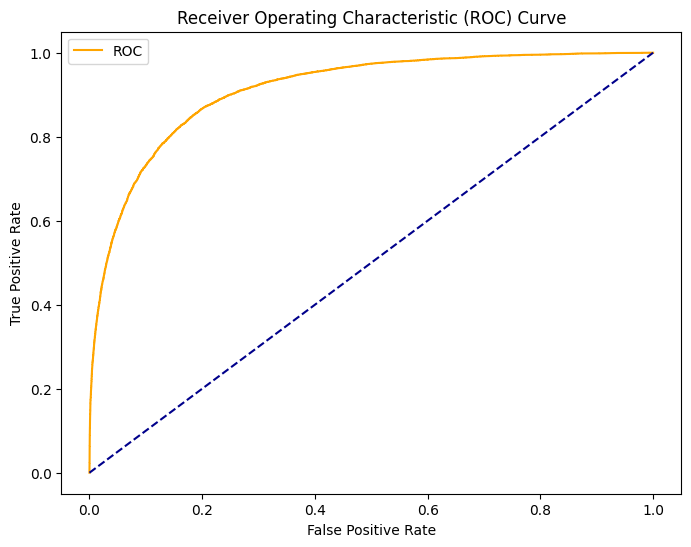

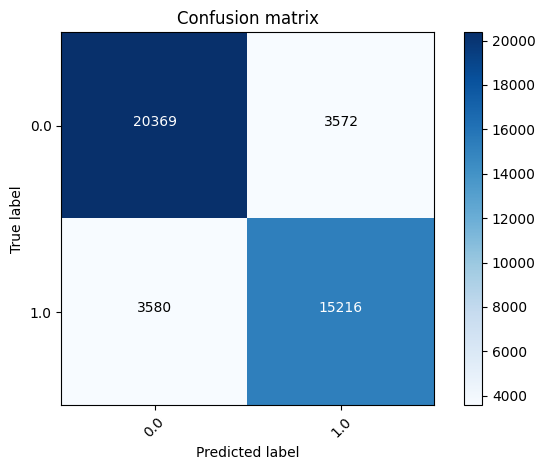

XGBoost Prediction: [1]
XGBoost Probability of Rain: 55.34%


In [ ]:
#XGBOOST
from xgboost import XGBClassifier


params_xgb = {'n_estimators': 100, 'learning_rate': 0.1, 'random_state': 12345}
model_xgb = XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, coh_kap_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)

prediction_xgb, prediction_proba_xgb = predict_weather(model_xgb, new_data_df)

prediction_xgb, prediction_proba_xgb = predict_weather(model_xgb, new_data_df)
print("XGBoost Prediction:", prediction_xgb)
print("XGBoost Probability of Rain:", "{:.2f}%".format(prediction_proba_xgb[0][1]*100))




Accuracy = 0.8083861759131432
ROC Area under Curve = 0.8036960189934185
Cohen's Kappa = 0.6096749401770324
Time taken = 53.35760450363159
              precision    recall  f1-score   support

         0.0    0.82021   0.84265   0.83128     23941
         1.0    0.79235   0.76474   0.77830     18796

    accuracy                        0.80839     42737
   macro avg    0.80628   0.80370   0.80479     42737
weighted avg    0.80796   0.80839   0.80798     42737



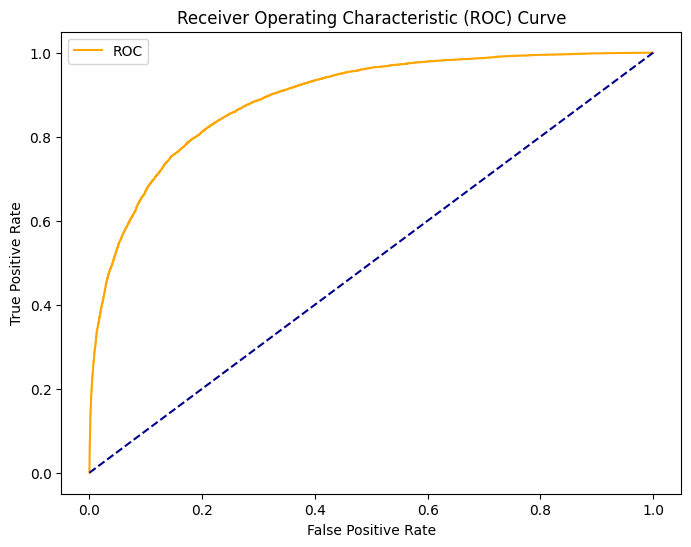

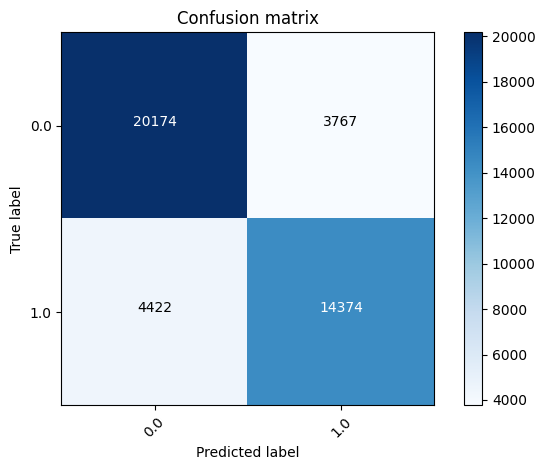

Gradient Boosting Prediction: [0.]
Gradient Boosting Probability of Rain: 46.23%


In [ ]:
#GRADIENT BOOST
from sklearn.ensemble import GradientBoostingClassifier

params_gbc = {'n_estimators': 100, 'learning_rate': 0.1, 'random_state': 12345}
model_gbc = GradientBoostingClassifier(**params_gbc)
model_gbc, accuracy_gbc, roc_auc_gbc, coh_kap_gbc, tt_gbc = run_model(model_gbc, X_train, y_train, X_test, y_test)

prediction_gbc, prediction_proba_gbc = predict_weather(model_gbc, new_data_df)

prediction_gbc, prediction_proba_gbc = predict_weather(model_gbc, new_data_df)
print("Gradient Boosting Prediction:", prediction_gbc)
print("Gradient Boosting Probability of Rain:", "{:.2f}%".format(prediction_proba_gbc[0][1]*100))


Accuracy = 0.8437419566183869
ROC Area under Curve = 0.8476923665442391
Cohen's Kappa = 0.6868019265617167
Time taken = 41.14046287536621
              precision    recall  f1-score   support

         0.0    0.89676   0.81488   0.85386     23941
         1.0    0.78877   0.88051   0.83212     18796

    accuracy                        0.84374     42737
   macro avg    0.84277   0.84769   0.84299     42737
weighted avg    0.84927   0.84374   0.84430     42737



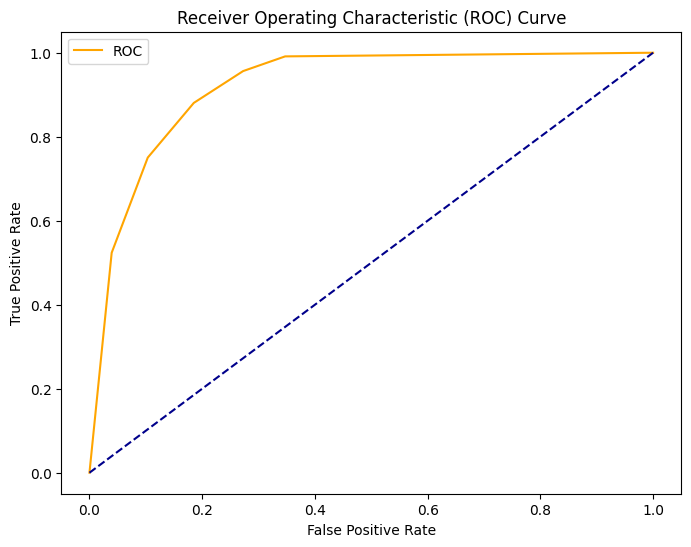

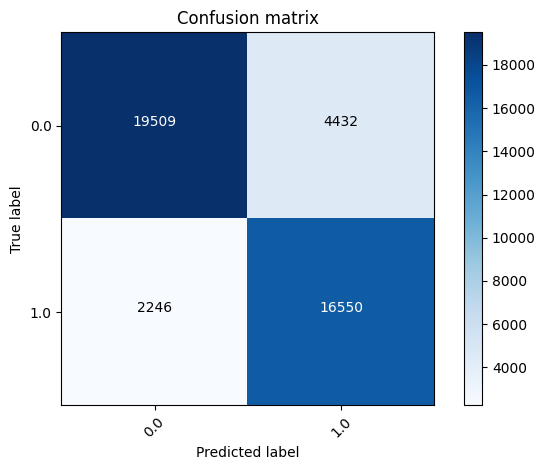

KNN Prediction: [0.]
KNN Probability of Rain: 20.00%


In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

params_knn = {'n_neighbors': 5}
model_knn = KNeighborsClassifier(**params_knn)
model_knn, accuracy_knn, roc_auc_knn, coh_kap_knn, tt_knn = run_model(model_knn, X_train, y_train, X_test, y_test)

prediction_knn, prediction_proba_knn = predict_weather(model_knn, new_data_df)

prediction_knn, prediction_proba_knn = predict_weather(model_knn, new_data_df)
print("KNN Prediction:", prediction_knn)
print("KNN Probability of Rain:", "{:.2f}%".format(prediction_proba_knn[0][1]*100))


Accuracy = 0.8846198844092941
ROC Area under Curve = 0.8872877944369149
Cohen's Kappa = 0.7678724872347278
Time taken = 2.357241630554199
              precision    recall  f1-score   support

         0.0    0.92407   0.86513   0.89363     23941
         1.0    0.84112   0.90945   0.87395     18796

    accuracy                        0.88462     42737
   macro avg    0.88259   0.88729   0.88379     42737
weighted avg    0.88758   0.88462   0.88497     42737



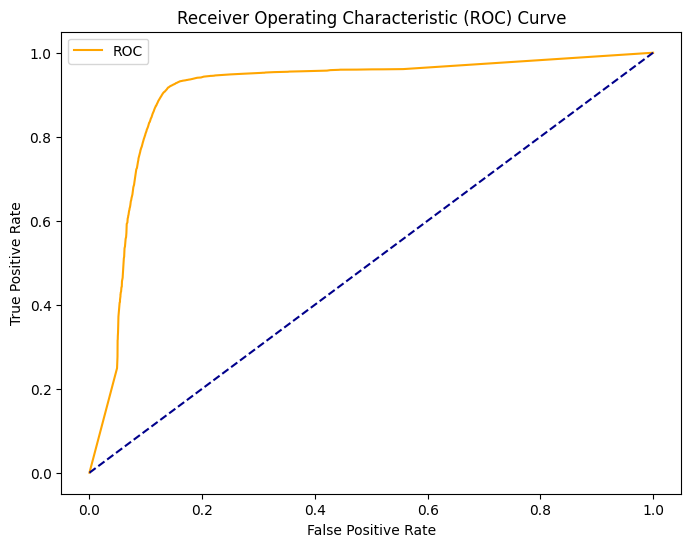

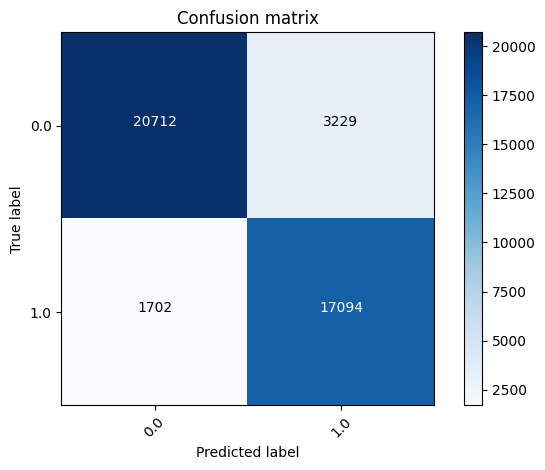

Decision Tree Prediction: [1.]
Decision Tree Probability of Rain: 100.00%


In [ ]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 16, 'min_samples_split': 2, 'min_samples_leaf': 1, 'random_state': 12345}
model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

prediction_dt, prediction_proba_dt = predict_weather(model_dt, new_data_df)
print("Decision Tree Prediction:", prediction_dt)
print("Decision Tree Probability of Rain:", "{:.2f}%".format(prediction_proba_dt[0][1]*100))


Accuracy = 0.7981140463766759
ROC Area under Curve = 0.7920294358535991
Cohen's Kappa = 0.5877211002347271
Time taken = 22.35110378265381
              precision    recall  f1-score   support

         0.0    0.80588   0.84257   0.82382     23941
         1.0    0.78713   0.74149   0.76363     18796

    accuracy                        0.79811     42737
   macro avg    0.79651   0.79203   0.79372     42737
weighted avg    0.79764   0.79811   0.79735     42737



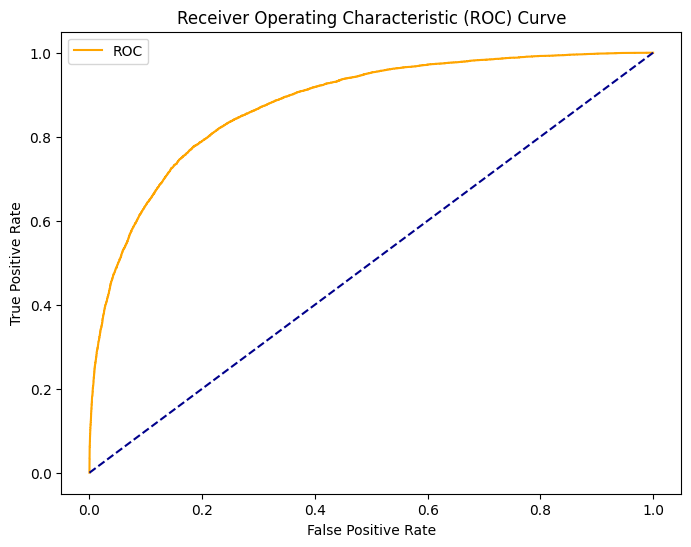

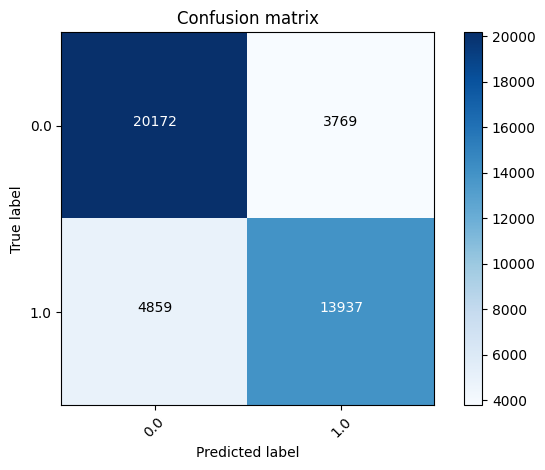

AdaBoost Prediction: [0.]
AdaBoost Probability of Rain: 49.86%


In [ ]:
#ADABOOST
from sklearn.ensemble import AdaBoostClassifier

params_ab = {'n_estimators': 100, 'random_state': 12345}
model_ab = AdaBoostClassifier(**params_ab)
model_ab, accuracy_ab, roc_auc_ab, coh_kap_ab, tt_ab = run_model(model_ab, X_train, y_train, X_test, y_test)

prediction_ab, prediction_proba_ab = predict_weather(model_ab, new_data_df)
print("AdaBoost Prediction:", prediction_ab)
print("AdaBoost Probability of Rain:", "{:.2f}%".format(prediction_proba_ab[0][1]*100))


[LightGBM] [Info] Number of positive: 56314, number of negative: 71897
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4330
[LightGBM] [Info] Number of data points in the train set: 128211, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.439229 -> initscore=-0.244291
[LightGBM] [Info] Start training from score -0.244291
Accuracy = 0.8466902215878512
ROC Area under Curve = 0.8457733187083424
Cohen's Kappa = 0.6897013899628485
Time taken = 3.256397247314453
              precision    recall  f1-score   support

         0.0    0.87040   0.85339   0.86181     23941
         1.0    0.81779   0.83816   0.82785     18796

    accuracy                        0.84669     42737
   macro avg    0.84410   0.84577   0.84483     42737
weighted avg    0.84727   0.846

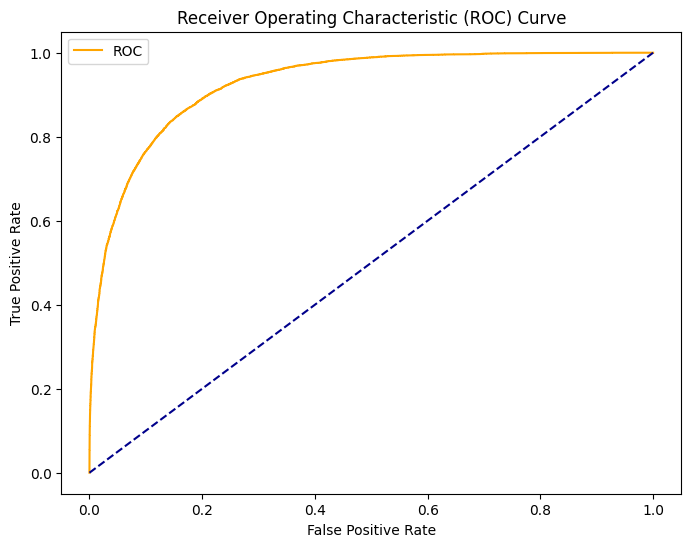

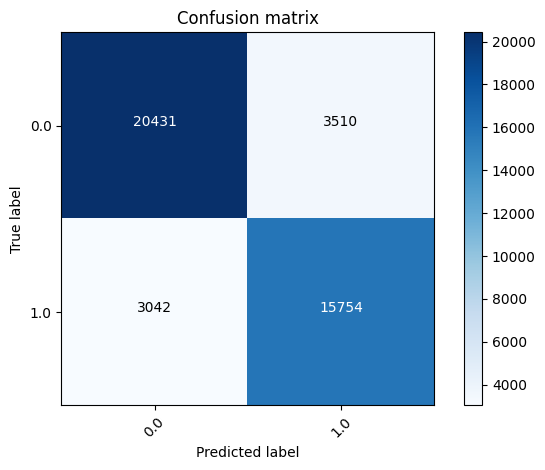

LightGBM Prediction: [1.]
LightGBM Probability of Rain: 59.19%


In [ ]:
#LIGHTGBM
import lightgbm as lgb

params_lgb = {'n_estimators': 100, 'max_depth': 16, 'learning_rate': 0.1, 'random_state': 12345}
model_lgb = lgb.LGBMClassifier(**params_lgb)
model_lgb, accuracy_lgb, roc_auc_lgb, coh_kap_lgb, tt_lgb = run_model(model_lgb, X_train, y_train, X_test, y_test)

prediction_lgb, prediction_proba_lgb = predict_weather(model_lgb, new_data_df)
print("LightGBM Prediction:", prediction_lgb)
print("LightGBM Probability of Rain:", "{:.2f}%".format(prediction_proba_lgb[0][1]*100))



[LightGBM] [Info] Number of positive: 56314, number of negative: 71897
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008254 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4330
[LightGBM] [Info] Number of data points in the train set: 128211, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.439229 -> initscore=-0.244291
[LightGBM] [Info] Start training from score -0.244291
[LightGBM] [Info] Number of positive: 45051, number of negative: 57517
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006671 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4330
[LightGBM] [Info] Number of data points in the train set: 102568, number of used features: 21
[LightGBM] [Info

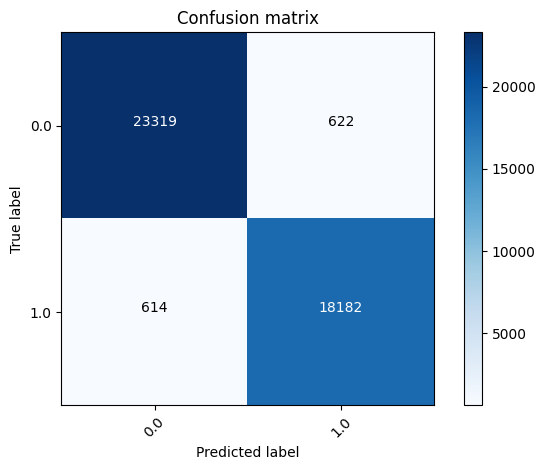

In [ ]:
#LOGISTIC REGRESSION - META MODEL
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, classification_report, confusion_matrix


base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=12345)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=12345)),
    ('lr', LogisticRegression(random_state=12345)),
    ('knn', KNeighborsClassifier()),
    ('ada', AdaBoostClassifier(n_estimators=100, random_state=12345)),
    ('dt', DecisionTreeClassifier(random_state=12345)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=12345)),
    ('lgbm', LGBMClassifier(random_state=12345))
]

meta_model_lr = LogisticRegression(random_state=12345)

stacking_model_lr = StackingClassifier(estimators=base_models, final_estimator=meta_model_lr, cv=5)

stacking_model_lr.fit(X_train, y_train)

y_pred_proba = stacking_model_lr.predict_proba(X_test)[:, 1]
y_pred = stacking_model_lr.predict(X_test)

#metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
coh_kap = cohen_kappa_score(y_test, y_pred)

print("Stacking Model with Logistic Regression Meta Accuracy:", accuracy)
print("Stacking Model with Logistic Regression Meta ROC AUC Score:", roc_auc)
print("Stacking Model with Logistic Regression Meta Cohen's Kappa:", coh_kap)
print(classification_report(y_test, y_pred))

plot_confusion_matrix(stacking_model_lr, X_test, y_test)

rain_probabilities = stacking_model_lr.predict_proba(X_test)[:, 1]

for i, prob in enumerate(rain_probabilities[:5]):
    print(f"Prediction for sample {i+1}: {prob*100:.2f}% chance of rain tomorrow.")



[LightGBM] [Info] Number of positive: 56314, number of negative: 71897
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008317 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4330
[LightGBM] [Info] Number of data points in the train set: 128211, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.439229 -> initscore=-0.244291
[LightGBM] [Info] Start training from score -0.244291
[LightGBM] [Info] Number of positive: 45051, number of negative: 57517
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006395 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4330
[LightGBM] [Info] Number of data points in the train set: 102568, number of used features: 21
[LightGBM] [Info

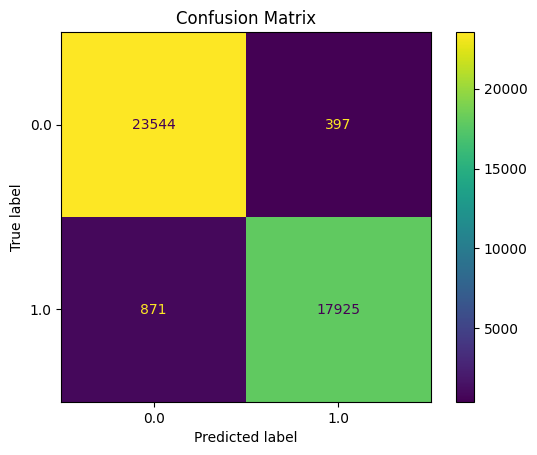

Prediction for sample 1: 100.00% chance of rain tomorrow.
Prediction for sample 2: 1.00% chance of rain tomorrow.
Prediction for sample 3: 0.00% chance of rain tomorrow.
Prediction for sample 4: 100.00% chance of rain tomorrow.
Prediction for sample 5: 18.00% chance of rain tomorrow.


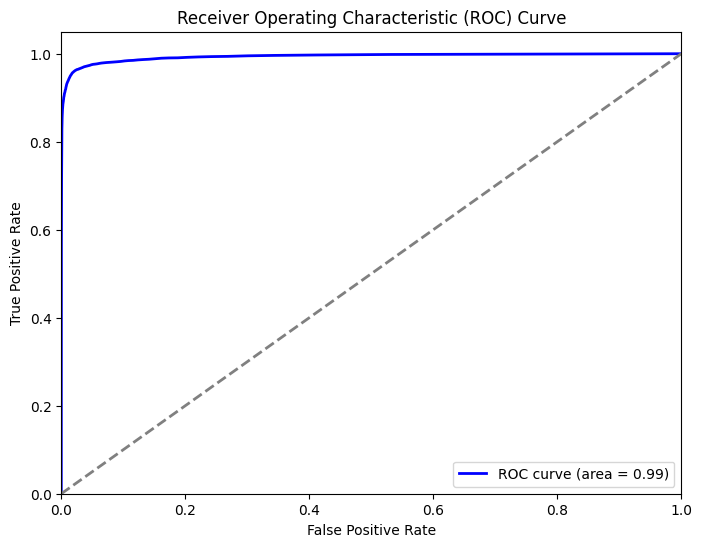

In [ ]:
#META MODEL - RANDOM FOREST
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.metrics import (accuracy_score, roc_auc_score, cohen_kappa_score,
                             classification_report, roc_curve, auc, ConfusionMatrixDisplay)

meta_model_rf = RandomForestClassifier(n_estimators=100, random_state=12345)

stacking_model_rf = StackingClassifier(estimators=base_models, final_estimator=meta_model_rf, cv=5)

stacking_model_rf.fit(X_train, y_train)

y_pred_proba = stacking_model_rf.predict_proba(X_test)[:, 1]

y_pred = stacking_model_rf.predict(X_test)

# metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
coh_kap = cohen_kappa_score(y_test, y_pred)

print("Stacking Model with Random Forest Meta Accuracy:", accuracy)
print("Stacking Model with Random Forest Meta ROC AUC Score:", roc_auc)
print("Stacking Model with Random Forest Meta Cohen's Kappa:", coh_kap)
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(stacking_model_rf, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()

rain_probabilities = stacking_model_rf.predict_proba(X_test)[:, 1]

for i, prob in enumerate(rain_probabilities[:5]):
    print(f"Prediction for sample {i + 1}: {prob * 100:.2f}% chance of rain tomorrow.")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc_value = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_value:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



In [ ]:
# XGBOOST AS META MODEL

from xgboost import XGBClassifier

meta_model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=12345)

stacking_model_xgb = StackingClassifier(estimators=base_models, final_estimator=meta_model_xgb, cv=5)

stacking_model_xgb.fit(X_train, y_train)

y_pred = stacking_model_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
coh_kap = cohen_kappa_score(y_test, y_pred)

print("Stacking Model with XGBoost Meta Accuracy:", accuracy)
print("Stacking Model with XGBoost Meta ROC AUC Score:", roc_auc)
print("Stacking Model with XGBoost Meta Cohen's Kappa:", coh_kap)
print(classification_report(y_test, y_pred))

rain_probabilities = stacking_model_xgb.predict_proba(X_test)[:, 1]

for i, prob in enumerate(rain_probabilities[:5]):
    print(f"Prediction for sample {i+1}: {prob*100:.2f}% chance of rain tomorrow.")






[LightGBM] [Info] Number of positive: 56314, number of negative: 71897
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4330
[LightGBM] [Info] Number of data points in the train set: 128211, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.439229 -> initscore=-0.244291
[LightGBM] [Info] Start training from score -0.244291
[LightGBM] [Info] Number of positive: 45051, number of negative: 57517
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021916 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4330
[LightGBM] [Info] Number of data points in the train set: 102568, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.439231 -> initscore=-0.244285


AdaBoost Accuracy: 0.7981140463766759
AdaBoost ROC AUC Score: 0.8772952853195474
AdaBoost Cohen's Kappa: 0.5877211002347271
AdaBoost Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.84      0.82     23941
         1.0       0.79      0.74      0.76     18796

    accuracy                           0.80     42737
   macro avg       0.80      0.79      0.79     42737
weighted avg       0.80      0.80      0.80     42737



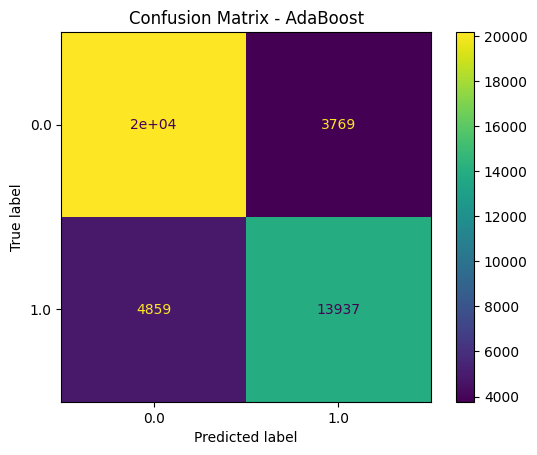

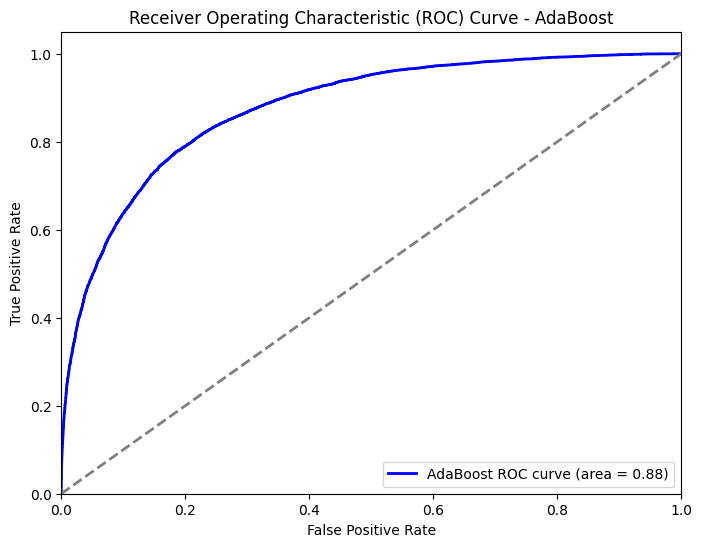

Gradient Boosting Accuracy: 0.8083861759131432
Gradient Boosting ROC AUC Score: 0.8911470047860705
Gradient Boosting Cohen's Kappa: 0.6096749401770324
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.84      0.83     23941
         1.0       0.79      0.76      0.78     18796

    accuracy                           0.81     42737
   macro avg       0.81      0.80      0.80     42737
weighted avg       0.81      0.81      0.81     42737



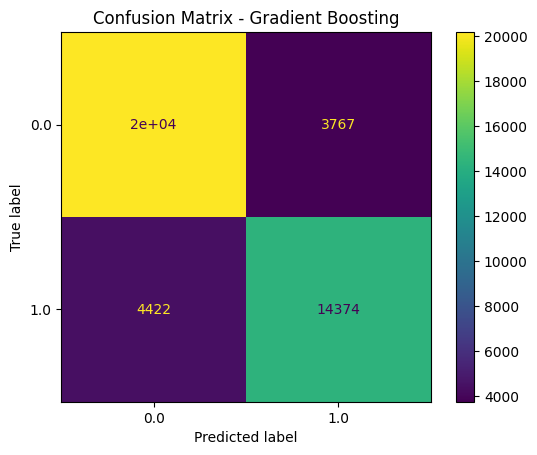

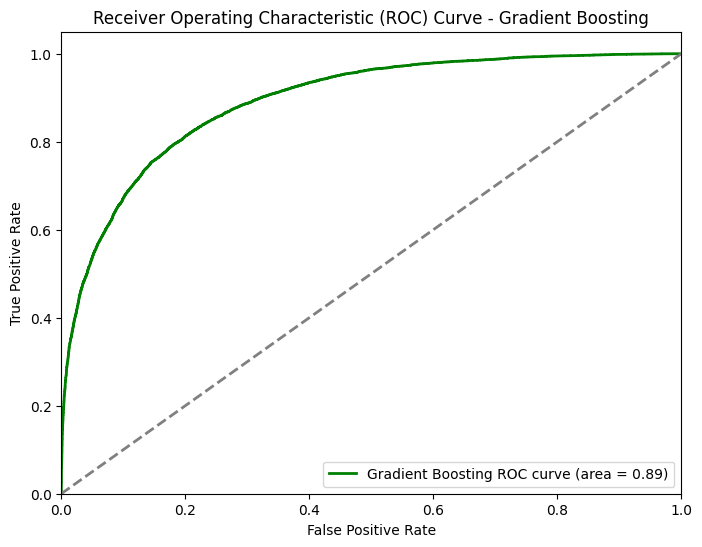

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import (accuracy_score, roc_auc_score, cohen_kappa_score,
                             classification_report, roc_curve, auc, ConfusionMatrixDisplay)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# AdaBoost Classifier
ada_boost_model = AdaBoostClassifier(n_estimators=100, random_state=12345)
ada_boost_model.fit(X_train, y_train)


y_pred_ada = ada_boost_model.predict(X_test)
y_pred_proba_ada = ada_boost_model.predict_proba(X_test)[:, 1]

accuracy_ada = accuracy_score(y_test, y_pred_ada)
roc_auc_ada = roc_auc_score(y_test, y_pred_proba_ada)
coh_kap_ada = cohen_kappa_score(y_test, y_pred_ada)

print("AdaBoost Accuracy:", accuracy_ada)
print("AdaBoost ROC AUC Score:", roc_auc_ada)
print("AdaBoost Cohen's Kappa:", coh_kap_ada)
print("AdaBoost Classification Report:\n", classification_report(y_test, y_pred_ada))


ConfusionMatrixDisplay.from_estimator(ada_boost_model, X_test, y_test)
plt.title("Confusion Matrix - AdaBoost")
plt.show()


fpr_ada, tpr_ada, _ = roc_curve(y_test, y_pred_proba_ada)
roc_auc_ada_value = auc(fpr_ada, tpr_ada)

plt.figure(figsize=(8, 6))
plt.plot(fpr_ada, tpr_ada, color='blue', lw=2, label=f'AdaBoost ROC curve (area = {roc_auc_ada_value:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - AdaBoost')
plt.legend(loc='lower right')
plt.show()

# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=12345)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)
y_pred_proba_gb = gb_model.predict_proba(X_test)[:, 1]

accuracy_gb = accuracy_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_pred_proba_gb)
coh_kap_gb = cohen_kappa_score(y_test, y_pred_gb)

print("Gradient Boosting Accuracy:", accuracy_gb)
print("Gradient Boosting ROC AUC Score:", roc_auc_gb)
print("Gradient Boosting Cohen's Kappa:", coh_kap_gb)
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))

ConfusionMatrixDisplay.from_estimator(gb_model, X_test, y_test)
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()

fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_proba_gb)
roc_auc_gb_value = auc(fpr_gb, tpr_gb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, color='green', lw=2, label=f'Gradient Boosting ROC curve (area = {roc_auc_gb_value:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Gradient Boosting')
plt.legend(loc='lower right')
plt.show()


Bagging Model Accuracy: 0.9539041111917074
Bagging Model ROC AUC Score: 0.9915134363837739
Bagging Model Cohen's Kappa: 0.9069069121931363
Bagging Model Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.94      0.96     23941
         1.0       0.93      0.97      0.95     18796

    accuracy                           0.95     42737
   macro avg       0.95      0.96      0.95     42737
weighted avg       0.95      0.95      0.95     42737



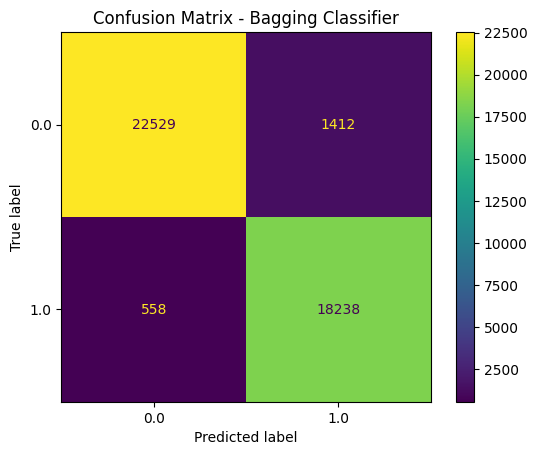

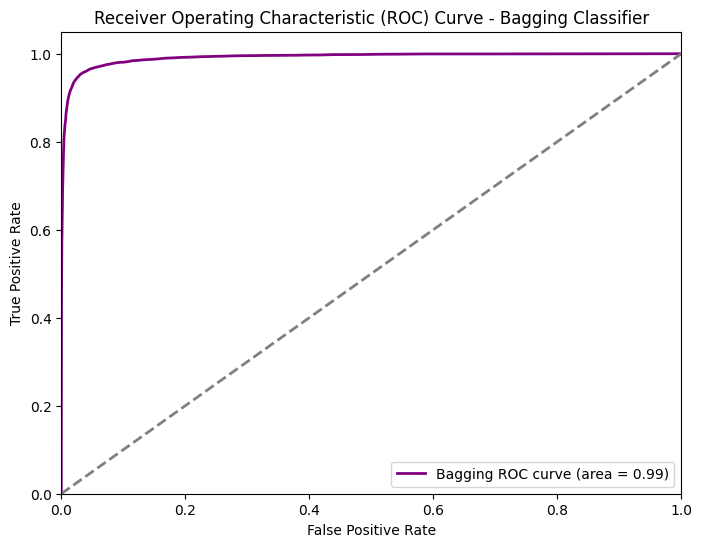

In [ ]:
#BAGGING
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, roc_auc_score, cohen_kappa_score,
                             classification_report, roc_curve, auc, ConfusionMatrixDisplay)
import matplotlib.pyplot as plt

bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=12345),
                                  n_estimators=100, random_state=12345)
bagging_model.fit(X_train, y_train)

y_pred_bag = bagging_model.predict(X_test)
y_pred_proba_bag = bagging_model.predict_proba(X_test)[:, 1]

accuracy_bag = accuracy_score(y_test, y_pred_bag)
roc_auc_bag = roc_auc_score(y_test, y_pred_proba_bag)
coh_kap_bag = cohen_kappa_score(y_test, y_pred_bag)

print("Bagging Model Accuracy:", accuracy_bag)
print("Bagging Model ROC AUC Score:", roc_auc_bag)
print("Bagging Model Cohen's Kappa:", coh_kap_bag)
print("Bagging Model Classification Report:\n", classification_report(y_test, y_pred_bag))

ConfusionMatrixDisplay.from_estimator(bagging_model, X_test, y_test)
plt.title("Confusion Matrix - Bagging Classifier")
plt.show()

fpr_bag, tpr_bag, _ = roc_curve(y_test, y_pred_proba_bag)
roc_auc_bag_value = auc(fpr_bag, tpr_bag)

plt.figure(figsize=(8, 6))
plt.plot(fpr_bag, tpr_bag, color='purple', lw=2, label=f'Bagging ROC curve (area = {roc_auc_bag_value:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Bagging Classifier')
plt.legend(loc='lower right')
plt.show()


[LightGBM] [Info] Number of positive: 56314, number of negative: 71897
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4330
[LightGBM] [Info] Number of data points in the train set: 128211, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.439229 -> initscore=-0.244291
[LightGBM] [Info] Start training from score -0.244291
[LightGBM] [Info] Number of positive: 45051, number of negative: 57517
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006658 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4330
[LightGBM] [Info] Number of data points in the train set: 102568, number of used features: 21
[LightGBM] [Info

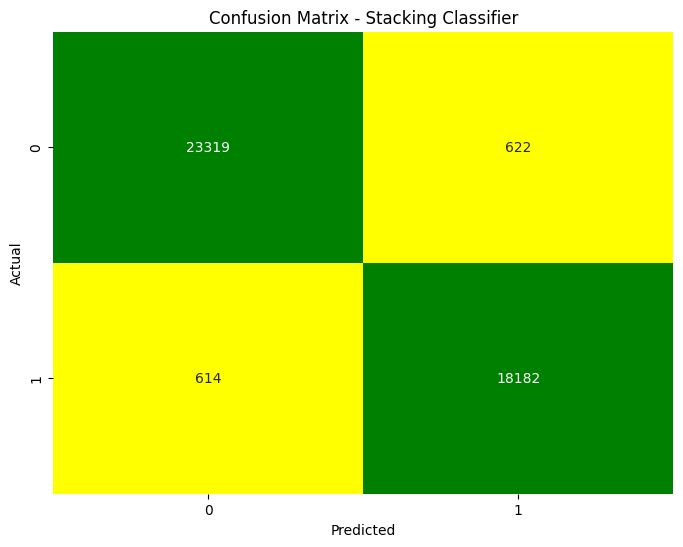

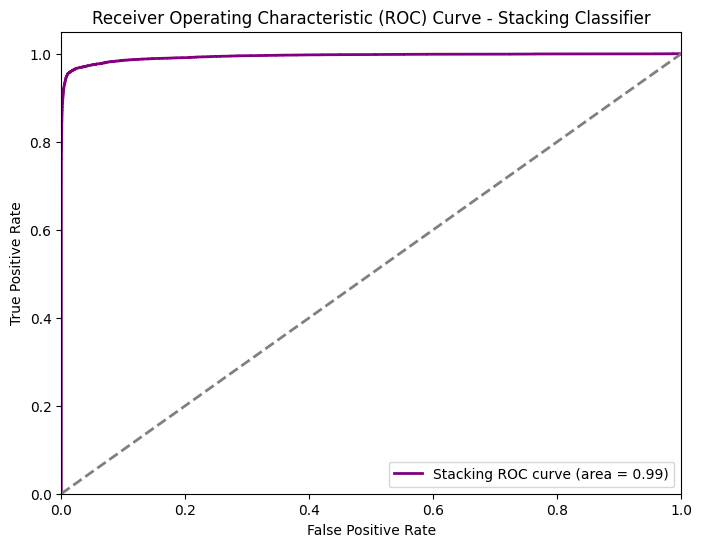

Prediction for sample 1: 98.68% chance of rain tomorrow.
Prediction for sample 2: 1.00% chance of rain tomorrow.
Prediction for sample 3: 0.29% chance of rain tomorrow.
Prediction for sample 4: 99.49% chance of rain tomorrow.
Prediction for sample 5: 24.78% chance of rain tomorrow.


In [ ]:
#META MODEL- LOGISTIC REGRESSION
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, classification_report
from sklearn.metrics import roc_curve, auc, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=12345)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=12345)),
    ('lr', LogisticRegression(random_state=12345)),
    ('knn', KNeighborsClassifier()),
    ('ada', AdaBoostClassifier(n_estimators=100, random_state=12345)),
    ('dt', DecisionTreeClassifier(random_state=12345)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=12345)),
    ('lgbm', LGBMClassifier(random_state=12345))
]

meta_model_lr = LogisticRegression(random_state=12345)

stacking_model_lr = StackingClassifier(estimators=base_models, final_estimator=meta_model_lr, cv=5)

stacking_model_lr.fit(X_train, y_train)

y_pred_proba = stacking_model_lr.predict_proba(X_test)[:, 1]
y_pred = stacking_model_lr.predict(X_test)

# metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
coh_kap = cohen_kappa_score(y_test, y_pred)

print("Stacking Model with Logistic Regression Meta Accuracy:", accuracy)
print("Stacking Model with Logistic Regression Meta ROC AUC Score:", roc_auc)
print("Stacking Model with Logistic Regression Meta Cohen's Kappa:", coh_kap)
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=sns.color_palette(["yellow", "purple", "green"]), cbar=False)
plt.title("Confusion Matrix - Stacking Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc_value = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='purple', lw=2, label=f'Stacking ROC curve (area = {roc_auc_value:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Stacking Classifier')
plt.legend(loc='lower right')
plt.show()

rain_probabilities = stacking_model_lr.predict_proba(X_test)[:, 1]

for i, prob in enumerate(rain_probabilities[:5]):
    print(f"Prediction for sample {i+1}: {prob*100:.2f}% chance of rain tomorrow.")


